# Imbalance Data


*   Train test split determine
*   Sampling method -> 3 ways
    - random oversampling
    - random undersampling
    - SMOTE
*   Evaluation metrics<br><br>
<img src="https://i.ibb.co/drSpCTZ/cop.jpg" alt="cop" border="0" width='450'>

# Micro-Macro Precision

A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance (i.e you may have many more examples of one class than of other classes).

<a href="https://ibb.co/JvC2dJW"><img src="https://i.ibb.co/m9StBWr/cop2.jpg" alt="cop2" border="0" width='450'></a>

micro-average will adequately capture this class imbalance

# ROC AUC
## Binary Case

In [6]:
import pandas as pd

In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot

In [3]:
X,y=load_breast_cancer(return_X_y=True)

In [14]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
clf=LogisticRegression(solver="liblinear").fit(X,y)

In [22]:
preds = clf.predict_proba(X)[:,1]

In [23]:
roc_auc_score(y, preds)

0.994767718408118

## Multiclass Case

In [24]:
from sklearn.datasets import load_iris

In [25]:
X, y = load_iris(return_X_y=True)

In [28]:
clf = LogisticRegression(solver="liblinear").fit(X,y)
preds = clf.predict_proba(X)
roc_auc_score(y, preds, multi_class='ovr')

0.9913333333333334

## Another binary case with plot

In [29]:
X,y=load_breast_cancer(return_X_y=True)

In [41]:
clf = LogisticRegression(solver='liblinear', ).fit(X,y)
lrpred = clf.predict_proba(X)[:,1]
npred = [0 for i in range(len(X))]
lr_auc = roc_auc_score(y, lrpred)
n_auc= roc_auc_score(y, npred)
print(lr_auc, n_auc)

0.994767718408118 0.5


In [42]:
lr_fpr, lr_tpr, _ = roc_curve(y,lrpred)
n_fpr, n_tpr, _ = roc_curve(y,npred)

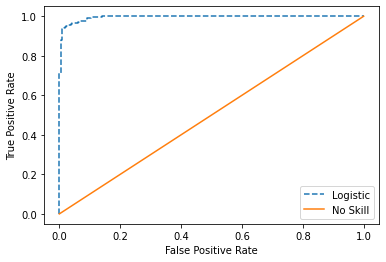

In [46]:
pyplot.plot(lr_fpr,lr_tpr, '--', label='Logistic')
pyplot.plot(n_fpr,n_tpr, '-',label='No Skill')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
pyplot.show()